In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

(4700, 4700, 3)


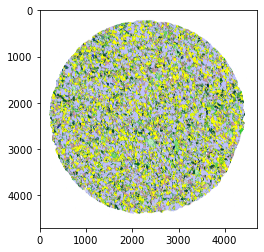

In [50]:
import cv2
img = cv2.imread('img9_labels.png')
print(img.shape)
plt.imshow(img)

(4700, 4640, 3)


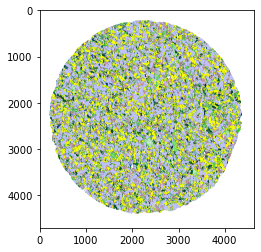

In [51]:
img_v = np.delete(img, range(365, 370), axis=1)
start = 365
for i in range(11):
    start += 355
    img_v = np.delete(img_v, range(start, start+5), axis=1)
print(img_v.shape)
plt.imshow(img_v)

(4664, 4640, 3)


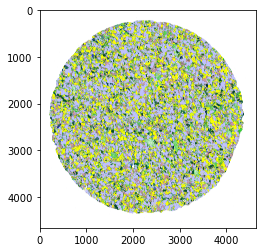

In [52]:
img_r = np.delete(img_v, range(367, 370), axis=0)
start = 367
for i in range(11):
    start += 357
    img_r = np.delete(img_r, range(start, start+3), axis=0)
print(img_r.shape)
plt.imshow(img_r)

(4664, 4676, 3)


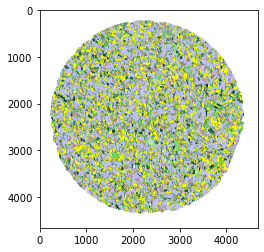

In [53]:
img_new = (np.ones((4664, 4640+3*12, 3)) * 255).astype(int)
img_new[:367, :4640, :] = img_r[:367, :, :]
start_r = 367
start_c = 3
for i in range(12):
    img_new[start_r:start_r+357, start_c:start_c+4640, :] = img_r[start_r:start_r+357, :, :]
    start_r += 357
    start_c += 3
print(img_new.shape)
plt.imshow(img_new)

(4664, 4676, 3)


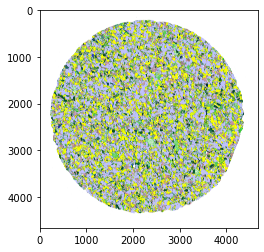

In [54]:
img_new_new = img_new
start_с = 365
start_r = 1
for i in range(12):
    img_new_new[:4664-start_r, start_c:start_c+355, :] = img_new[start_r:, start_c:start_c+355, :]
    start_r += 1
    start_c += 355
img_new_new[:4664-start_r, start_c:, :] = img_new[start_r:, start_c:, :]
print(img_new_new.shape)
plt.imshow(img_new_new)

In [55]:
cv2.imwrite('img9_labels_FIX.png', img_new)

True